# Linear Regression - Real Estate Data Set

> Joseph P. Vantassel, The University of Texas at Austin

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model as lm

## Load Data Set

In [2]:
df = pd.read_csv("real_estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Understanding the Data

We have 6 features:

- Transaction data (decimal years): last date the house sold
- House age (decimal years): years since built
- Distance to nearest MRT station (decimal meters): distance to train station
- Number of Convenience stores (integer)
- Latitude (decimal degrees)
- Longitude (decimal degrees)
    
We have one value we are trying to predict:

- Unit price (decimal currency)

In [3]:
# convert to numpy
xfeatures = df.iloc[:, 1:-1].to_numpy()
ypredict = df.iloc[:, -1].to_numpy()

# make sure we did the slices correctly
print(xfeatures[0, :])
print(ypredict[0])

[2012.917     32.        84.87882   10.        24.98298  121.54024]
37.9


In [4]:
print(f"xfeatures.shape = {xfeatures.shape}")
print(f"ypredict.shape = {ypredict.shape}")

xfeatures.shape = (414, 6)
ypredict.shape = (414,)


## Shuffle & Split

Shuffle the dataset and split into train, validation, and test.

In [6]:
ptrain, pvalid, ptest = 0.7, 0.15, 0.15

# shuffle
rng = np.random.default_rng(1824)
shuffle_idxs = np.arange(len(ypredict))
rng.shuffle(shuffle_idxs)
xfeatures_shuffled = xfeatures[shuffle_idxs]
ypredict_shuffled = ypredict[shuffle_idxs]

# split
start_idx, stop_idx = 0, int(ptrain*len(ypredict))
xfeatures_train, ypredict_train = xfeatures_shuffled[start_idx: stop_idx], ypredict_shuffled[start_idx: stop_idx]
print(xfeatures_train.shape, ypredict_train.shape)


start_idx, stop_idx = stop_idx, stop_idx+int(pvalid*len(ypredict))
xfeatures_valid, ypredict_valid = xfeatures_shuffled[start_idx: stop_idx], ypredict_shuffled[start_idx: stop_idx]
print(xfeatures_valid.shape, ypredict_valid.shape)


start_idx, stop_idx = stop_idx, -1
xfeatures_test, ypredict_test = xfeatures_shuffled[start_idx: stop_idx], ypredict_shuffled[start_idx: stop_idx]
print(xfeatures_test.shape, ypredict_test.shape)


(289, 6) (289,)
(62, 6) (62,)
(62, 6) (62,)


## View the Training Set

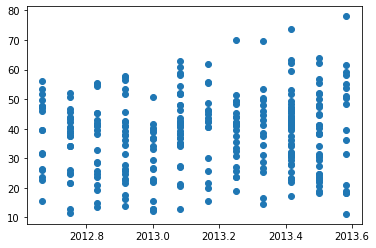

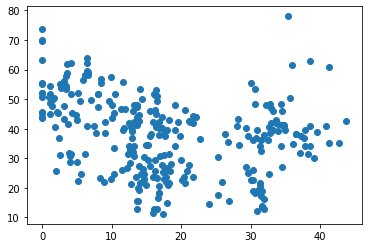

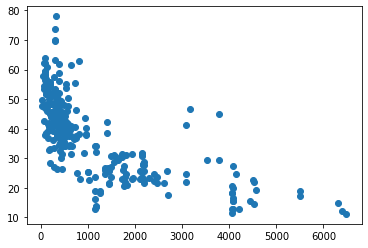

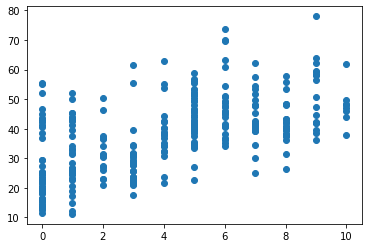

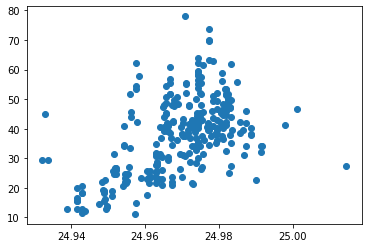

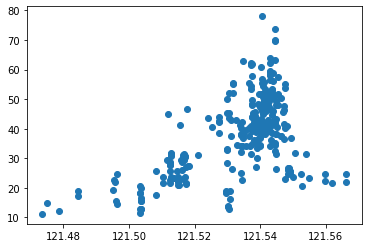

In [33]:
for feature in xfeatures_train.T:
    plt.scatter(feature, ypredict_train)
    plt.show()

## Normalize Training Set

Scale the training set's features to consist of a series of small values (between approx -3 and 3) with a mean of zero.

In [7]:
xmeans = np.mean(xfeatures_train, axis=0)
print("xmeans", xmeans)
xstds = np.std(xfeatures_train, axis=0, ddof=1)
print("xstds", xstds)

xfeatures_train_normed = (xfeatures_train - xmeans) / xstds
print("min", np.min(xfeatures_train_normed, axis=0))
print("max", np.max(xfeatures_train_normed, axis=0))
print("mean", np.mean(xfeatures_train_normed, axis=0))

xmeans [2013.15370934   17.73875433 1096.77751277    4.11418685   24.96912228
  121.53322848]
xstds [2.81894838e-01 1.14429633e+01 1.29862762e+03 2.96930584e+00
 1.26616573e-02 1.56482131e-02]
min [-1.72656351 -1.55018887 -0.82656079 -1.38557194 -2.92633759 -3.81503479]
max [1.5228752  2.27749097 4.15149302 1.98221856 3.59097669 2.11152048]
mean [-4.42653642e-12 -5.16407371e-16 -2.46630859e-16  4.45625851e-17
 -8.83526239e-14 -5.92967313e-12]


## Create Model and Train

While we could write our own linear classifier, we will borrow sklearn's instead.

In [10]:
def rmse(yhat, y):
    "Define the Root-Mean-Square Error."
    return np.sqrt(np.mean(np.power(yhat - y, 2)))

In [11]:
# create our model
linmod = lm.LinearRegression(fit_intercept=True)
# fit model to the training set
trained_model = linmod.fit(xfeatures_train_normed, ypredict_train)

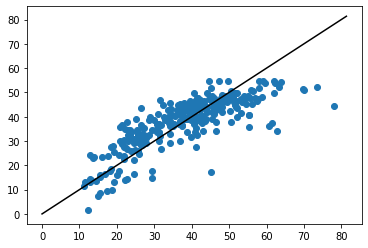

RMSE = 7.75


In [12]:
yhat_train = trained_model.predict(xfeatures_train_normed)

plt.scatter(ypredict_train, yhat_train, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.show()

print(f"RMSE = {rmse(yhat_train, ypredict_train):.2f}")

## Predict on Validation Set

In [13]:
xfeatures_valid_normed = (xfeatures_valid - xmeans) / xstds
yhat_valid = trained_model.predict(xfeatures_valid_normed)

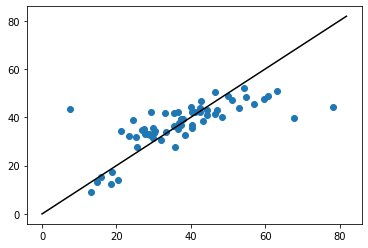

RMSE = 9.41


In [14]:
plt.scatter(ypredict_valid, yhat_valid, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.show()

print(f"RMSE = {rmse(yhat_valid, ypredict_valid):.2f}")

## Error Analysis

So it looks like we are underfitting the data and this is resulting in relatively high error. Lets look at the residuals to see where our model is not fitting well.

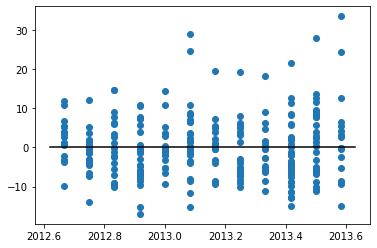

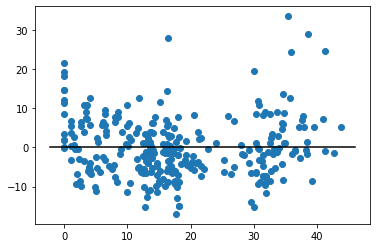

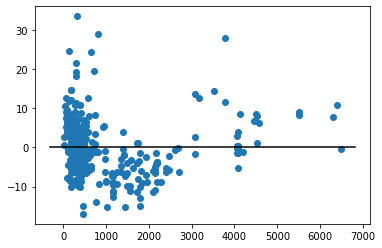

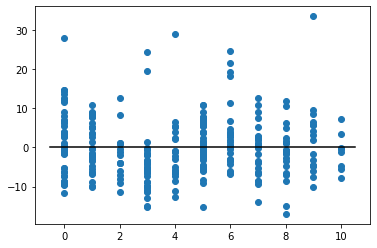

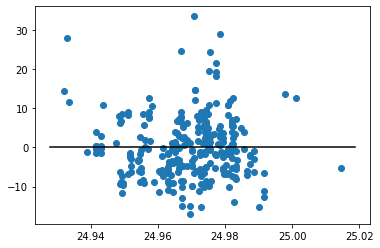

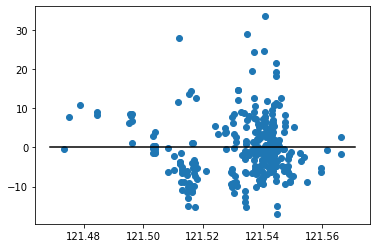

In [18]:
residual = ypredict_train - yhat_train
for feature in xfeatures_train.T:
    plt.scatter(feature, residual)
    plt.plot(plt.xlim(), [0,0], color="black")
    plt.show()

## Repeat Training with Quadratic Terms

We see from the error analysis that we are under-predicting many point quite substantially. These points are not quite distinguishable based on any one parameter by itself, therefore we need to increase the interaction between parameters to hopefully find a good representation, one way that we can do that is by including all of the quadratic terms.

In [21]:
xfeatures_train_quad = []

for start, pfeature in enumerate(xfeatures_train.T):
    for sfeature in xfeatures_train.T[start:]:
        xfeatures_train_quad.append(pfeature * sfeature)

xfeatures_train_quad = np.array(xfeatures_train_quad).T

print(xfeatures_train_quad.shape)

(289, 21)


In [70]:
xmeans_quad = np.mean(xfeatures_train_quad, axis=0)
xstds_quad = np.std(xfeatures_train_quad, axis=0, ddof=1)
xfeatures_train_quad_normed = (xfeatures_train_quad - xmeans_quad) / xstds_quad

In [71]:
# create our model
linmod_quad = lm.LinearRegression(fit_intercept=True)
# fit model to the training set
trained_model_quad = linmod_quad.fit(xfeatures_train_quad_normed, ypredict_train)

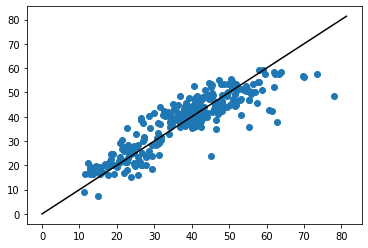

RMSE = 6.13


In [72]:
yhat_train = trained_model_quad.predict(xfeatures_train_quad_normed)

plt.scatter(ypredict_train, yhat_train, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.show()

print(f"RMSE = {rmse(yhat_train, ypredict_train):.2f}")

### Test on Validation Set

In [73]:
xfeatures_valid_quad = []

for start, pfeature in enumerate(xfeatures_valid.T):
    for sfeature in xfeatures_valid.T[start:]:
        xfeatures_valid_quad.append(pfeature * sfeature)

xfeatures_valid_quad = np.array(xfeatures_valid_quad).T
print(xfeatures_valid_quad.shape)

(62, 21)


In [74]:
xfeatures_valid_quad_normed = (xfeatures_valid_quad - xmeans_quad) / xstds_quad
yhat_valid = trained_model_quad.predict(xfeatures_valid_quad_normed)

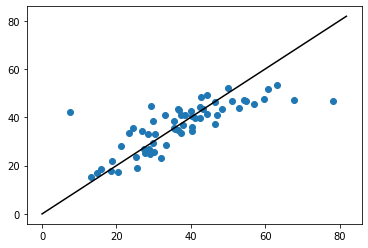

RMSE = 8.66


In [75]:
plt.scatter(ypredict_valid, yhat_valid, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.show()

print(f"RMSE = {rmse(yhat_valid, ypredict_valid):.2f}")

### Error Analysis

Still see some very poor predictions. Lets like we tend to underpredict, lets look at a few of these examples to understand what is going on.

In [28]:
threshold = 0.75 # when predicted is less than 50% of the true

idx = np.argwhere(np.abs(yhat_train/ypredict_train) < threshold).flatten()

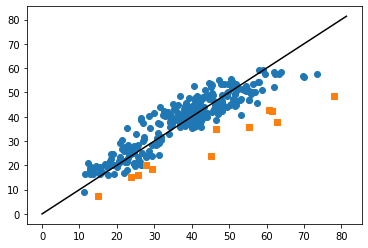

RMSE = 6.13
RMSE = 17.24


In [29]:
plt.scatter(ypredict_train, yhat_train, marker="o")
plt.scatter(ypredict_train[idx], yhat_train[idx], marker="s")

value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.show()

print(f"RMSE = {rmse(yhat_train, ypredict_train):.2f}")
print(f"RMSE = {rmse(yhat_train[idx], ypredict_train[idx]):.2f}")

In [30]:
pd.DataFrame(xfeatures_train[idx, :])

,0,1,2,3,4,5
0,2012.917,17.2,2175.8770,3.0,24.96303,121.51254
1,2013.167,30.1,718.2937,3.0,24.97509,121.53644
2,2013.583,35.9,640.7391,3.0,24.97563,121.53715
3,2012.833,18.0,6306.1530,1.0,24.95743,121.47516
4,2012.667,20.4,2469.6450,4.0,24.96108,121.51046
5,2013.417,11.9,3171.3290,0.0,25.00115,121.51776
6,2013.500,16.4,3780.5900,0.0,24.93293,121.51203
7,2013.083,41.3,124.9912,6.0,24.96674,121.54039
8,2013.583,35.4,318.5292,9.0,24.97071,121.54069
9,2013.000,16.3,3529.5640,0.0,24.93207,121.51597


Lets see how they compare to their neighbors.

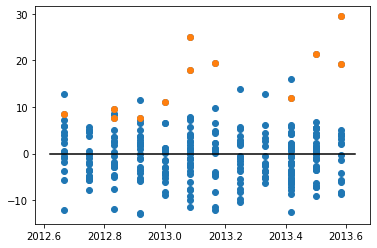

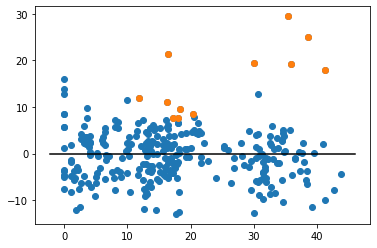

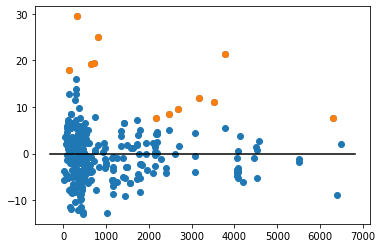

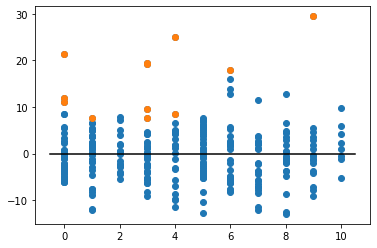

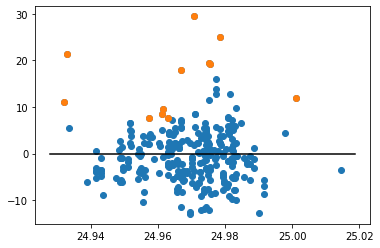

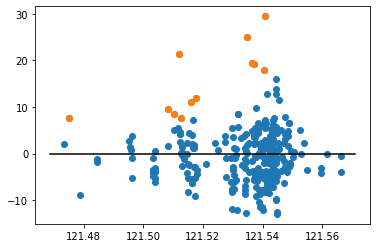

In [32]:
residual = ypredict_train - yhat_train
for feature in xfeatures_train.T:
    plt.scatter(feature, residual)
    plt.scatter(feature[idx], residual[idx])
    plt.plot(plt.xlim(), [0,0], color="black")
    plt.show()

## Try Adding the Reciprocal Terms

We are still not seeing a bit improvement lets try to now add the 1/x terms in addition to the quadratic ones we tried before.

In [66]:
eps = 1E-6
xfeatures_train_quadrecip = np.hstack((xfeatures_train, 1/(xfeatures_train + eps)))
xfeatures_valid_quadrecip = np.hstack((xfeatures_valid, 1/(xfeatures_valid + eps)))

xmeans_quadrecip = np.mean(xfeatures_train_quadrecip, axis=0)
xstds_quadrecip = np.std(xfeatures_train_quadrecip, axis=0, ddof=1)

xfeatures_train_quadrecip_normed = (xfeatures_train_quadrecip - xmeans_quadrecip) / xstds_quadrecip
xfeatures_valid_quadrecip_normed = (xfeatures_valid_quadrecip - xmeans_quadrecip) / xstds_quadrecip

### Fit on Training Data

In [67]:
# create our model
linmod_quadrecip = lm.LinearRegression(fit_intercept=True)
# fit model to the training set
trained_model_quadrecip = linmod_quadrecip.fit(xfeatures_train_quadrecip_normed, ypredict_train)

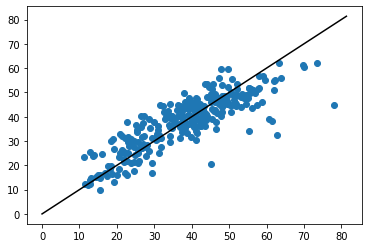

RMSE = 6.90


In [68]:
yhat_train = trained_model_quadrecip.predict(xfeatures_train_quadrecip_normed)

plt.scatter(ypredict_train, yhat_train, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.show()

print(f"RMSE = {rmse(yhat_train, ypredict_train):.2f}")

### Test on Validation Data

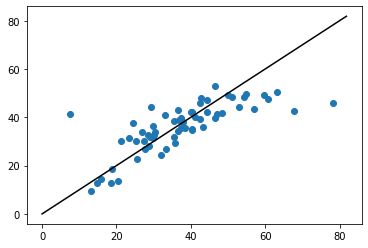

RMSE = 8.99


In [69]:
yhat_valid = trained_model_quadrecip.predict(xfeatures_valid_quadrecip_normed)

plt.scatter(ypredict_valid, yhat_valid, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.show()

print(f"RMSE = {rmse(yhat_valid, ypredict_valid):.2f}")

## Error Analysis



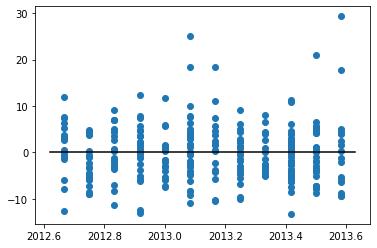

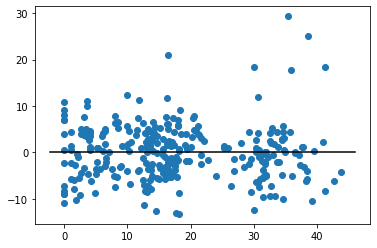

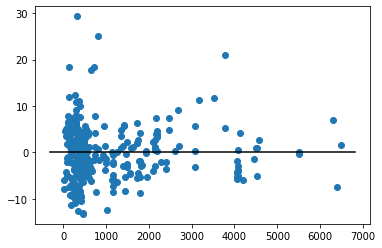

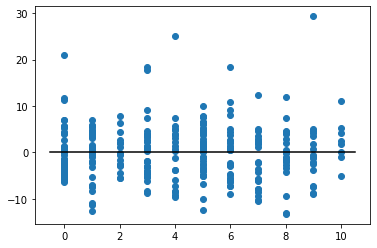

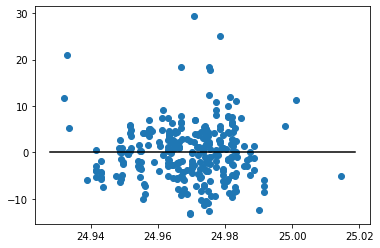

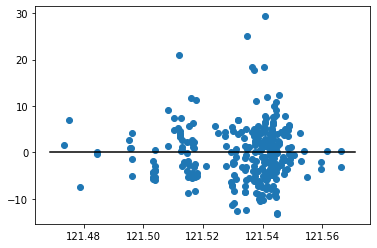

In [43]:
residual = ypredict_train - yhat_train
for feature in xfeatures_train.T:
    plt.scatter(feature, residual)
    plt.plot(plt.xlim(), [0,0], color="black")
    plt.show()

## Try Adding the Logarithmic and Exponential Terms

In [62]:
eps = 1E-6
xmin_xfeatures_train = np.min(xfeatures_train, axis=0)
xmax_xfeatures_train = np.max(xfeatures_train, axis=0)
xfeatures_train_quadlog = np.hstack((xfeatures_train, np.log10(xfeatures_train+eps), np.exp((xfeatures_train - xmin_xfeatures_train)/(xmax_xfeatures_train - xmin_xfeatures_train))))
xfeatures_valid_quadlog = np.hstack((xfeatures_valid, np.log10(xfeatures_valid+eps), np.exp((xfeatures_valid - xmin_xfeatures_train)/(xmax_xfeatures_train - xmin_xfeatures_train))))

xmeans_quadlog = np.mean(xfeatures_train_quadlog, axis=0)
xstds_quadlog = np.std(xfeatures_train_quadlog, axis=0, ddof=1)

xfeatures_train_quadlog_normed = (xfeatures_train_quadlog - xmeans_quadlog) / xstds_quadlog
xfeatures_valid_quadlog_normed = (xfeatures_valid_quadlog - xmeans_quadlog) / xstds_quadlog

In [63]:
# create our model
linmod_quadlog = lm.LinearRegression(fit_intercept=True)
# fit model to the training set
trained_model_quadlog = linmod_quadlog.fit(xfeatures_train_quadlog_normed, ypredict_train)

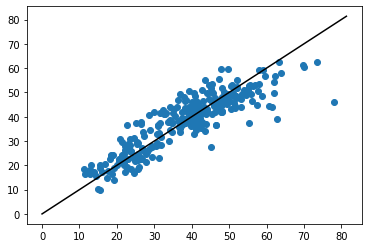

RMSE = 6.08


In [64]:
yhat_train = trained_model_quadlog.predict(xfeatures_train_quadlog_normed)

plt.scatter(ypredict_train, yhat_train, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.show()

print(f"RMSE = {rmse(yhat_train, ypredict_train):.2f}")

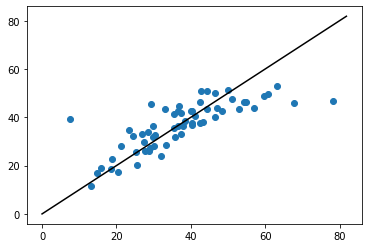

RMSE = 8.62


In [65]:
yhat_valid = trained_model_quadlog.predict(xfeatures_valid_quadlog_normed)

plt.scatter(ypredict_valid, yhat_valid, marker="o")
value = np.max(plt.xlim())
plt.plot([0, value], [0, value], linestyle="-", color="black")
plt.show()

print(f"RMSE = {rmse(yhat_valid, ypredict_valid):.2f}")

## Error Analaysis